In [1]:
import findspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
import warnings 
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

findspark.init()
spark = SparkSession.builder.getOrCreate()

In [4]:
df = spark.read.csv('../database/csv/olist_order_reviews_dataset.csv', header = True)

df.show(5)

+--------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+
|           review_id|            order_id|review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|
+--------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+
|7bc2406110b926393...|73fc7af87114b3971...|           4|                NULL|                  NULL| 2018-01-18 00:00:00|    2018-01-18 21:46:59|
|80e641a11e56f04c1...|a548910a1c6147796...|           5|                NULL|                  NULL| 2018-03-10 00:00:00|    2018-03-11 03:05:13|
|228ce5500dc1d8e02...|f9e4b658b201a9f2e...|           5|                NULL|                  NULL| 2018-02-17 00:00:00|    2018-02-18 14:36:24|
|e64fb393e7b32834b...|658677c97b385a9be...|           5|                NULL|  Recebi bem antes ...| 2017-04-21 00:00:00|   

In [22]:
df.count()

104162

In [18]:
df.printSchema()

root
 |-- review_id: string (nullable = true)
 |-- order_id: string (nullable = true)
 |-- review_score: string (nullable = true)
 |-- review_comment_title: string (nullable = true)
 |-- review_comment_message: string (nullable = true)
 |-- review_creation_date: string (nullable = true)
 |-- review_answer_timestamp: string (nullable = true)



In [21]:
df.select([f.count(f.when(f.isnull(col), 1)).alias(col) for col in df.columns]).show()

+---------+--------+------------+--------------------+----------------------+--------------------+-----------------------+
|review_id|order_id|review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|
+---------+--------+------------+--------------------+----------------------+--------------------+-----------------------+
|        1|    2236|        2380|               92157|                 63079|                8764|                   8785|
+---------+--------+------------+--------------------+----------------------+--------------------+-----------------------+



In [25]:
df_review = df.dropna()

df_review.select([f.count(f.when(f.isnull(col),1)).alias(col) for col in df_review.columns]).show()

+---------+--------+------------+--------------------+----------------------+--------------------+-----------------------+
|review_id|order_id|review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|
+---------+--------+------------+--------------------+----------------------+--------------------+-----------------------+
|        0|       0|           0|                   0|                     0|                   0|                      0|
+---------+--------+------------+--------------------+----------------------+--------------------+-----------------------+



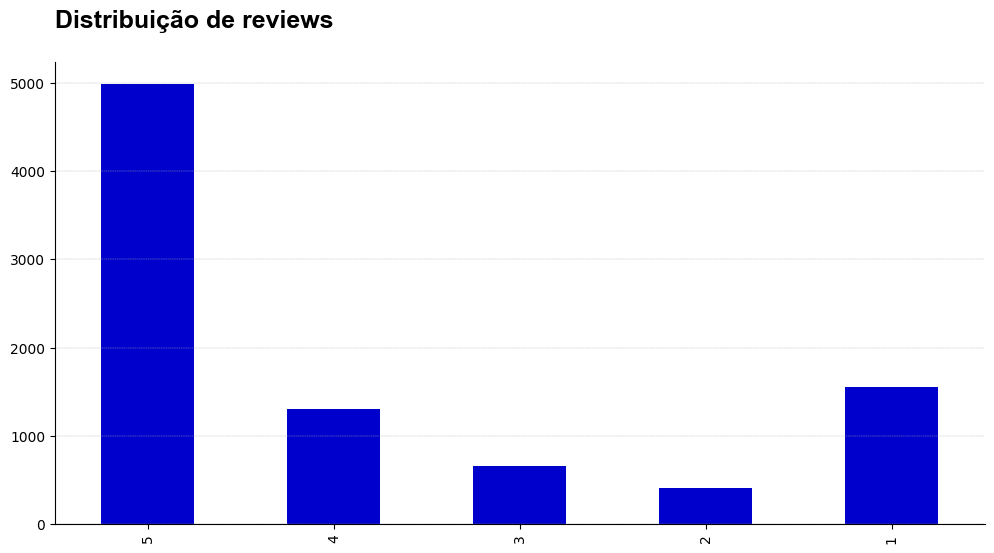

In [48]:
df_review\
    .where("review_score IN ('1','2','3','4','5')")\
    .groupBy('review_score')\
    .agg(
        f.count('order_id').alias('qtd_pedidos_avaliados'),
    )\
    .orderBy('review_score', ascending = False)\
    .toPandas()\
    .set_index('review_score')\
    .plot(kind = 'bar', color = 'mediumblue', figsize = (12,6))

# plt.figure(figsize = (12,6))
plt.title('Distribuição de reviews\n', fontfamily = 'arial', fontweight = 'bold', fontsize = 18, loc = 'left')
plt.gca().get_legend().set_visible(False)
plt.grid(True, axis = 'y', linestyle = '--', linewidth = .3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_xlabel('')
plt.show()

In [51]:
sample = df_review.select('review_comment_title').sample(fraction = 0.1, seed = 27)
lista_texto = [texto['review_comment_title'] for texto in sample.collect()]

In [53]:
wordcloud = WordCloud(
    background_color = 'white',
    width = 1000,
    height = 600,
    collocations = False,
    prefer_horizontal = True
).generate(str(lista_texto))

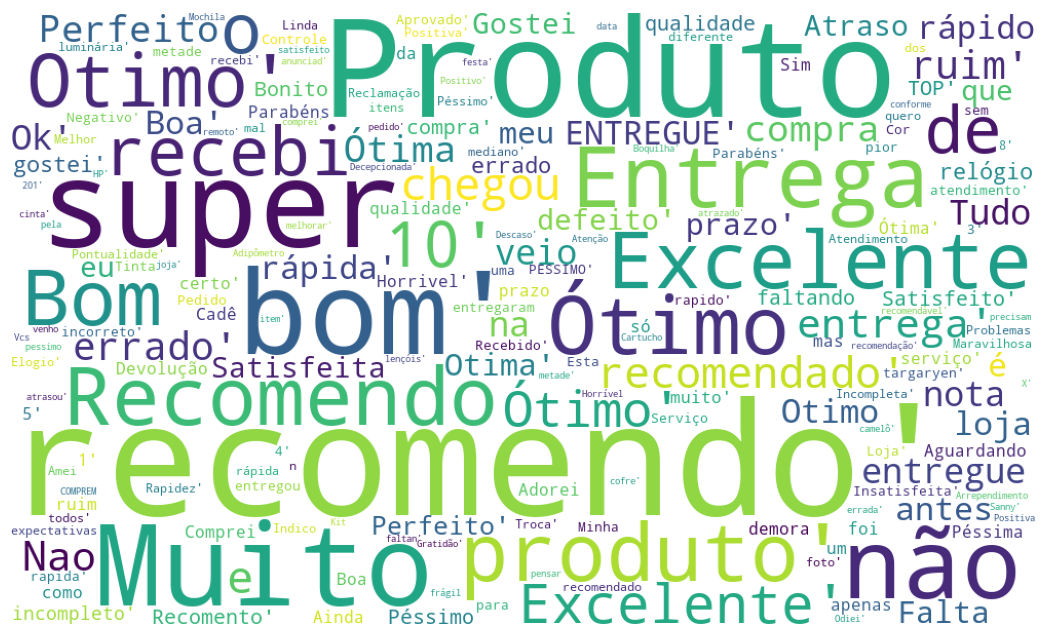

In [55]:
plt.figure(figsize = (20, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()